In [1]:
%cd ..

/home/napulen/AugmentedNet


In [2]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
summary = "dataset/dataset_summary.tsv"
dfsummary = pd.read_csv(summary, sep="\t")

In [4]:
training = dfsummary[dfsummary.split == "training"]

In [6]:
df = None
for nickname in training.file:
    tsvpath = os.path.join("dataset", "training", f"{nickname}.tsv")
    print(tsvpath)
    dffile = pd.read_csv(tsvpath, sep="\t")
    dffile = dffile[dffile.a_harmonicRhythm == 0]
    if df is None:
        df = dffile
    else:
        df = pd.concat([df, dffile], ignore_index=True)

dataset/training/bps-02-op002-no2-1.tsv
dataset/training/bps-03-op002-no3-1.tsv
dataset/training/bps-04-op007-1.tsv
dataset/training/bps-05-op010-no1-1.tsv
dataset/training/bps-09-op014-no1-1.tsv
dataset/training/bps-11-op022-1.tsv
dataset/training/bps-12-op026-1.tsv
dataset/training/bps-13-op027-no1-1.tsv
dataset/training/bps-17-op031-no2-1.tsv
dataset/training/bps-18-op031-no3-1.tsv
dataset/training/bps-21-op053-1.tsv
dataset/training/bps-22-op054-1.tsv
dataset/training/bps-24-op078-1.tsv
dataset/training/bps-27-op090-1.tsv
dataset/training/bps-28-op101-1.tsv
dataset/training/bps-30-op109-1.tsv
dataset/training/bps-31-op110-1.tsv
dataset/training/bps-32-op111-1.tsv
dataset/training/wirwtc-bach-wtc-i-1.tsv
dataset/training/wirwtc-bach-wtc-i-2.tsv
dataset/training/wirwtc-bach-wtc-i-4.tsv
dataset/training/wirwtc-bach-wtc-i-5.tsv
dataset/training/wirwtc-bach-wtc-i-6.tsv
dataset/training/wirwtc-bach-wtc-i-10.tsv
dataset/training/wirwtc-bach-wtc-i-13.tsv
dataset/training/wirwtc-bach-wtc-i-

In [7]:
df[(df.a_romanNumeral == "N") & (df.a_pcset == (1, 5, 8))]

,j_offset,s_duration,s_measure,s_notes,s_intervals,s_isOnset,a_measure,a_duration,a_annotationNumber,a_romanNumeral,...,a_localKey,a_tonicizedKey,a_degree1,a_degree2,measureMisalignment,qualityScoreNotes,qualityNonChordTones,qualityMissingChordTones,qualitySquaredSum,incongruentBass


,Roman numeral,Counts
18,N,235


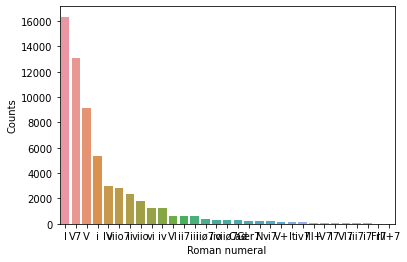

In [8]:
# roman numerals
rncounts = df.a_romanNumeral.value_counts().to_dict()
dfrn = pd.DataFrame({"Roman numeral": list(rncounts.keys()), "Counts": list(rncounts.values())})
sns.barplot(x="Roman numeral", y="Counts", data=dfrn)
dfrn[dfrn["Roman numeral"] == "N"]

Bass


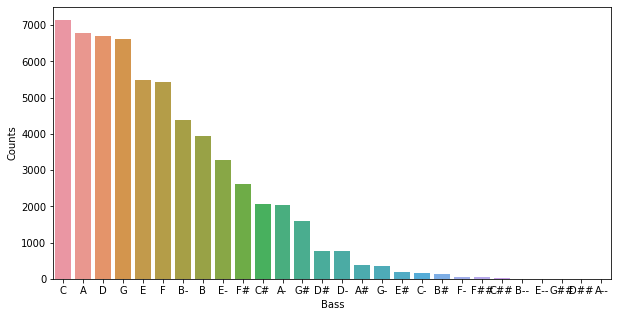

Tenor


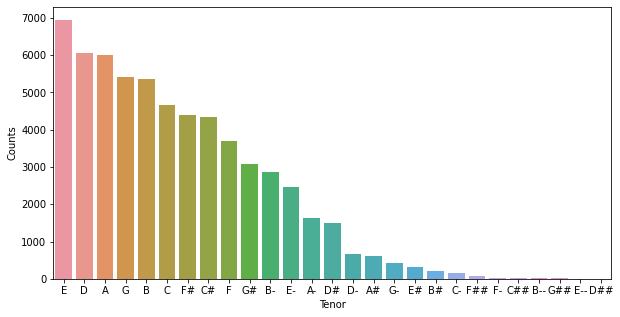

Alto


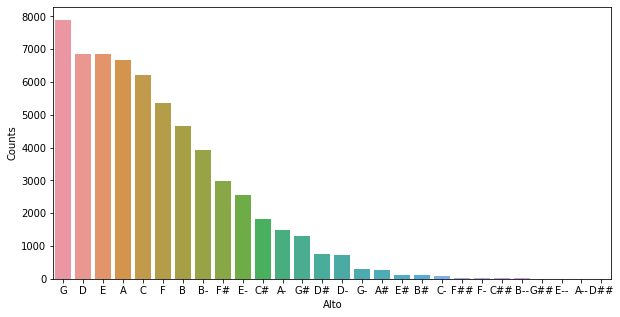

Soprano


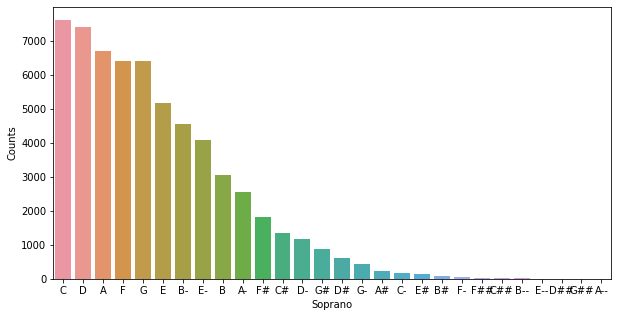

Quality


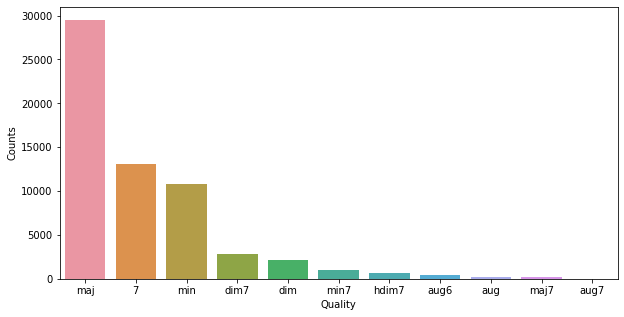

Root


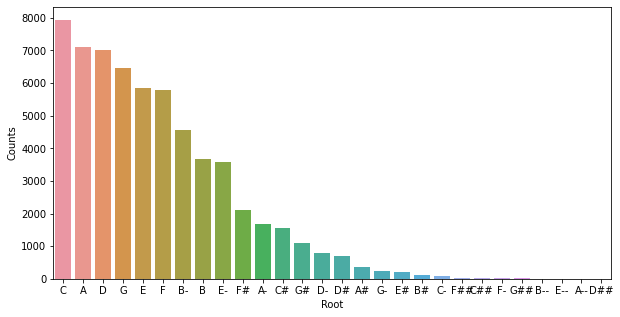

In [20]:
# note distribution
for voice in ["Bass", "Tenor", "Alto", "Soprano", "Quality", "Root"]:
    print(voice)
    notecounts = df[f"a_{voice.lower()}"].value_counts().to_dict()
    dfbass = pd.DataFrame({voice: list(notecounts.keys()), "Counts": list(notecounts.values())})
    sns.barplot(x=voice, y="Counts", data=dfbass)
    plt.show()

In [ ]:
# pcsets
rncounts = df.a_pcset.value_counts().to_dict()
dfrn = pd.DataFrame({"Roman numeral": list(rncounts.keys()), "Counts": list(rncounts.values())})
sns.barplot(x="Roman numeral", y="Counts", data=dfrn)